In [1]:
import pandas as pd, ipywidgets as widgets, numpy as np, matplotlib.pyplot as plt, io
from adjustText import adjust_text
raw_uploader, eln_uploader = widgets.FileUpload(multiple = False), widgets.FileUpload(multiple = False)
display("Upload ELN w/ GloSensor Data and Antibodies Sheet (xlsx)")
display(eln_uploader)

'Upload ELN w/ GloSensor Data and Antibodies Sheet (xlsx)'

FileUpload(value={}, description='Upload')

In [2]:
elnname = list(eln_uploader.value.keys())[0]
eln = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']))
glo_agonist_data = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']), sheet_name = "GloSensor Agonist")
glo_antagonist_data = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']), sheet_name = "GloSensor Antagonist")
ab_sheet = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']), sheet_name = "Antibody Plate Map")
glo_agonist_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,41.405,82.810,51.756,82.810,72.459,82.810,93.161,62.108,103.513,113.864,93.161,103.513,155.269,51.756,186.323,62.108,113.864
1,72.459,103.513,124.215,103.513,113.864,103.513,103.513,134.566,124.215,186.323,82.810,103.513,93.161,93.161,155.269,227.728,165.620
2,124.215,93.161,165.620,103.513,186.323,134.566,93.161,155.269,238.079,196.674,113.864,144.918,238.079,165.620,207.025,144.918,196.674
3,103.513,113.864,93.161,113.864,155.269,51.756,93.161,165.620,186.323,165.620,72.459,113.864,165.620,134.566,248.430,124.215,269.133
4,72.459,113.864,175.971,103.513,103.513,82.810,113.864,217.376,175.971,227.728,155.269,134.566,196.674,113.864,155.269,196.674,207.025
5,134.566,155.269,196.674,144.918,175.971,82.810,186.323,186.323,113.864,155.269,72.459,155.269,175.971,113.864,103.513,103.513,258.781
6,155.269,113.864,134.566,175.971,155.269,103.513,124.215,103.513,144.918,186.323,93.161,134.566,113.864,103.513,165.620,134.566,155.269
7,82.810,144.918,93.161,103.513,196.674,82.810,165.620,196.674,207.025,103.513,155.269,134.566,144.918,113.864,175.971,82.810,248.430
8,124.215,103.513,103.513,186.323,134.566,134.566,103.513,207.025,165.620,103.513,134.566,124.215,144.918,196.674,144.918,93.161,186.323
9,113.864,207.025,134.566,196.674,186.323,103.513,217.376,144.918,134.566,289.835,134.566,144.918,134.566,113.864,217.376,62.108,175.971


In [9]:
#Concatenate all agonists and antagonist columns into a their respective single Series
glo_agonist_column = pd.Series()
for column in glo_agonist_data.columns:
    colToAdd = glo_agonist_data[column]
    glo_agonist_column = pd.concat([glo_agonist_column, colToAdd], axis = 0, ignore_index = True)

#Same for antagonists
glo_antagonist_column = pd.Series()
for column in glo_agonist_data.columns:
    colToAdd = glo_antagonist_data[column]
    glo_antagonist_column = pd.concat([glo_antagonist_column, colToAdd], axis = 0, ignore_index = True)

/var/folders/hb/zkjzwn3n2dqc5b49y7f8tbpc0000gq/T/ipykernel_44686/2877778947.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  glo_agonist_column = pd.Series()
/var/folders/hb/zkjzwn3n2dqc5b49y7f8tbpc0000gq/T/ipykernel_44686/2877778947.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  glo_antagonist_column = pd.Series()


0       51.886
1      114.148
2      145.280
3      197.165
4       93.394
        ...   
267    134.902
268    145.280
269    114.148
270    114.148
271     72.640
Name: Antagonist Mode, Length: 272, dtype: float64

In [16]:
#Separate n=1 and n=2 duplicates, average them and reset the indeces: for Agonist conditions
firsts = glo_agonist_column.iloc[::2]
seconds = glo_agonist_column.iloc[1::2]
first_reset = firsts.reset_index(drop = True)
second_reset = seconds.reset_index(drop = True)
averageAgonists = first_reset + second_reset
averageAgonists = averageAgonists / 2

0       56.9320
1      113.8640
2      103.5125
3      119.0395
4      119.0395
         ...   
131    201.8495
132    181.1470
133    108.6880
134    124.2150
135    113.8640
Name: Agonist Mode, Length: 136, dtype: float64

In [17]:
#Do the same with the Antagonist condition
firsts = glo_antagonist_column.iloc[::2]
seconds = glo_antagonist_column.iloc[1::2]
first_reset = firsts.reset_index(drop = True)
second_reset = seconds.reset_index(drop = True)
averageAntagonists = first_reset + second_reset
averageAntagonists = averageAntagonists / 2

0       83.0170
1      171.2225
2      124.5255
3      134.9020
4      140.0910
         ...   
131    191.9765
132    202.3535
133    155.6565
134    129.7140
135     93.3940
Name: Antagonist Mode, Length: 136, dtype: float64

In [34]:
#Create new DF for concatenating the Agonist, Antagonist signals, and the Antibody Plate Map
OutputSheet = pd.concat([averageAgonists, averageAntagonists, ab_sheet], axis = 1)
OutputSheet.index += 1
OutputSheet.rename(inplace = True, columns = {0: "Agonist Mode", 1: "Antagonist Mode"})
OutputSheetCleaned = OutputSheet[["Agonist Mode", "Antagonist Mode", "DNA", "Protein Concentration (ug/uL)"]]
OutputSheetCleaned.to_excel("GloSensor_Output.xlsx")
AgonistSort = OutputSheetCleaned.sort_values(by="Agonist Mode", ascending = False)

,Agonist Mode,Antagonist Mode,DNA,Protein Concentration (ug/uL)
130,232.9035,181.5995,SC-122_185,0.00
131,232.9030,166.0340,SC-122_186,0.01
120,232.9030,243.8620,SC-122_170,0.02
114,227.7275,217.9190,SC-122_158,0.01
103,212.2010,134.9025,SC-122_146,0.06
...,...,...,...,...
7,77.6345,150.4680,SC-122_008,0.06
105,72.4585,46.6970,SC-122_148,0.00
128,56.9320,88.2055,SC-122_179,0.03
1,56.9320,83.0170,SC-122_001,0.04


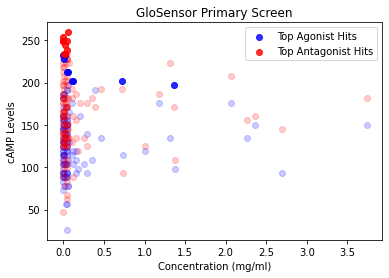

In [40]:
Top10Agonists = OutputSheetCleaned.nlargest(10, "Agonist Mode")
Top10Antagonists = OutputSheetCleaned.nlargest(10, "Antagonist Mode")
fig, ax = plt.subplots()
ax.scatter(x = OutputSheetCleaned["Protein Concentration (ug/uL)"], y=OutputSheetCleaned["Agonist Mode"], alpha = .2, color = "blue")
ax.scatter(x = OutputSheetCleaned["Protein Concentration (ug/uL)"], y=OutputSheetCleaned["Antagonist Mode"], alpha = .2, color = "red")
ax.scatter(x = Top10Agonists["Protein Concentration (ug/uL)"], y = Top10Agonists["Agonist Mode"], alpha = .8, color = "blue", label = "Top Agonist Hits")
ax.scatter(x = Top10Antagonists["Protein Concentration (ug/uL)"], y = Top10Antagonists["Antagonist Mode"], alpha = .8, color = "red", label = "Top Antagonist Hits")
ax.set_title("GloSensor Primary Screen")
ax.set_xlabel("Concentration (mg/ml)")
ax.set_ylabel("cAMP Levels")
ax.legend()
